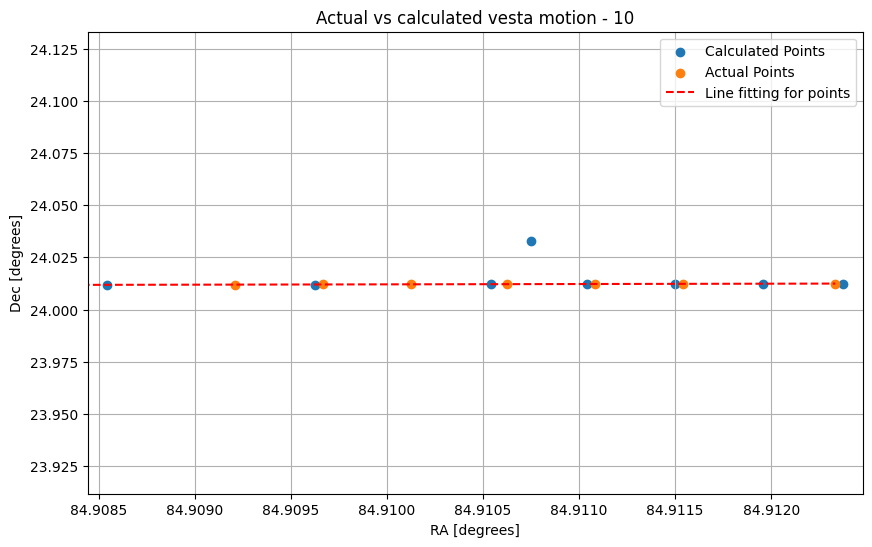

In [1]:
#10 FOCAL LENGTH
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.patches import FancyArrowPatch
import numpy as np


# 0831-10
# RA: 5h 39m 38.05s
# Dec: 24° 0' 42.56''
#0838-10
# RA: 5h 39m 38.31s
# Dec: 24° 0' 43.12''
#0841-10
# RA: 5h 39m 38.58s
# Dec: 24° 0' 59.02''
#0844-10
# RA: 5h 39m 38.53s
# Dec: 24° 0' 43.61''
#0847-10
# RA: 5h 39m 38.65s
# Dec: 24° 0' 43.84''
#0850-10
# RA: 5h 39m 38.76s
# Dec: 24° 0' 44.09''
#0853-10
# RA: 5h 39m 38.87s
# Dec: 24° 0' 44.38''
#0858-10
# RA: 5h 39m 38.97s
# Dec: 24° 0' 44.62''



# Data
ra_hours = [5, 5, 5, 5, 5, 5, 5, 5]
ra_minutes = [39, 39, 39, 39, 39, 39, 39, 39]
ra_seconds = np.array([38.05, 38.31, 38.58, 38.53, 38.65, 38.76, 38.87, 38.97])
ra_secondsUpdated = []


# print(ra_secondsUpdated)

dec_degrees = [24, 24, 24, 24, 24, 24, 24, 24]
dec_arcminutes = [0, 0, 1, 0, 0, 0, 0, 0]
dec_arcseconds = [42.56, 43.12, 59.02, 43.61, 43.84, 44.09, 44.38, 44.62]

ra_hours_actual = [5, 5, 5, 5, 5, 5, 5, 5]
ra_minutes_actual = [39, 39, 39, 39, 39, 39, 39, 39]
ra_seconds_actual = np.array([37.95, 38.21, 38.32, 38.43, 38.55, 38.66, 38.77, 38.96])
# 6.87, 6.84, 6.99, 6.81,
# Define a polynomial function for curve fitting
# def poly_func(x, *coeffs):
#     return sum([coeffs[i] * x**i for i in range(len(coeffs))])

# # Fit the polynomial function to the data
# coeffs, _ = curve_fit(poly_func, ra_seconds, ra_seconds_actual, p0=(1, 1, 1, 1, 1))

# Use the fitted polynomial to predict the actual ra_seconds values
# ra_seconds_aligned = poly_func(ra_seconds, *coeffs)

# print(ra_seconds_aligned)


# for i in range(len(ra_seconds)):
#     ra_secondsUpdated.append(((ra_seconds[i]+ra_seconds_actual[i])/2)-2)

dec_degrees_actual = [24, 24, 24, 24, 24, 24, 24, 24]
dec_arcminutes_actual = [0, 0, 0, 0, 0, 0, 0, 0]
dec_arcseconds_actual = [42.4, 43.1, 43.3, 43.6, 43.84, 44.1, 44.4, 44.8]

# Convert RA to decimal degrees
ra_decimal = [(hours + minutes/60 + seconds/3600) * 15 for hours, minutes, seconds in zip(ra_hours, ra_minutes, ra_seconds)]

# Convert Dec to decimal degrees
dec_decimal = [degrees + arcminutes/60 + arcseconds/3600 for degrees, arcminutes, arcseconds in zip(dec_degrees, dec_arcminutes, dec_arcseconds)]


# Convert RA to decimal degrees
ra_decimal_actual = [(hours + minutes/60 + seconds/3600) * 15 for hours, minutes, seconds in zip(ra_hours_actual, ra_minutes_actual, ra_seconds_actual)]

# Convert Dec to decimal degrees
dec_decimal_actual = [degrees + arcminutes/60 + arcseconds/3600 for degrees, arcminutes, arcseconds in zip(dec_degrees_actual, dec_arcminutes_actual, dec_arcseconds_actual)]




# Fit two straight lines through the new points
coefficients_1 = np.polyfit(ra_decimal, dec_decimal, 1)
polynomial_1 = np.poly1d(coefficients_1)
x_1 = np.linspace(min(ra_decimal), max(ra_decimal), 100)
y_1 = polynomial_1(x_1)

coefficients_2 = np.polyfit(ra_decimal_actual, dec_decimal_actual, 1)
polynomial_2 = np.poly1d(coefficients_2)
x_2 = np.linspace(min(ra_decimal_actual), max(ra_decimal_actual), 100)
y_2 = polynomial_2(x_2)



# Plot both sets of points and the fitted lines
plt.figure(figsize=(10, 6))
plt.scatter(ra_decimal, dec_decimal, label='Calculated Points')
plt.scatter(ra_decimal_actual, dec_decimal_actual, label='Actual Points')
# plt.plot(x_1, y_1, color='green',linestyle='--', label='Line fitting for calculated points',)
plt.plot(x_2, y_2, color='red',linestyle='--', label='Line fitting for points')

plt.xlabel('RA [degrees]')
plt.ylabel('Dec [degrees]')
plt.title('Actual vs calculated vesta motion - 10')
plt.legend()
plt.grid(True)
plt.xlim(min(ra_decimal) - 0.0001, max(ra_decimal) + 0.0001)
plt.ylim(min(dec_decimal) - 0.1, max(dec_decimal) + 0.1)
plt.show()


